## **TASK 2 - Prediction Using Unsupervised ML**
* From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### Author - Ashwin NS
---

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
%matplotlib inline
print("Required libraries and dataset imported")

Required libraries and dataset imported


## Loading the Iris dataset.

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.tail(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**To check for null values and drop duplicate values.**

In [4]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
iris_df.drop_duplicates(inplace=True)

**Correlation.**

In [6]:
corr_df = iris_df.corr()
corr_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


## Data Visualization.

**Heat map.**

<AxesSubplot:>

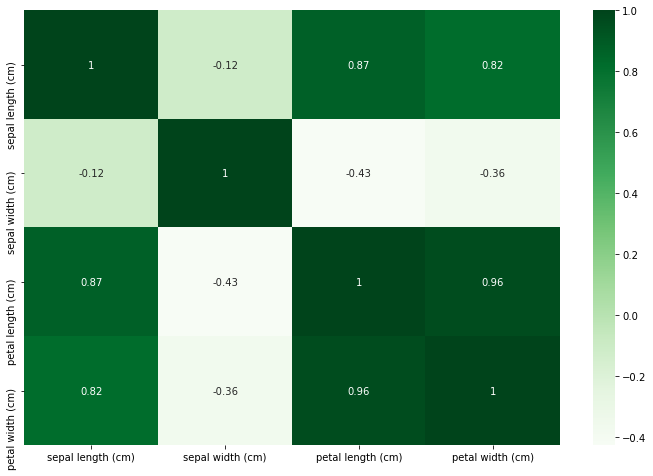

In [7]:
plt.figure(figsize=[12,8])
sns.heatmap(corr_df,cmap="Greens", annot=True)

**Histograms.**

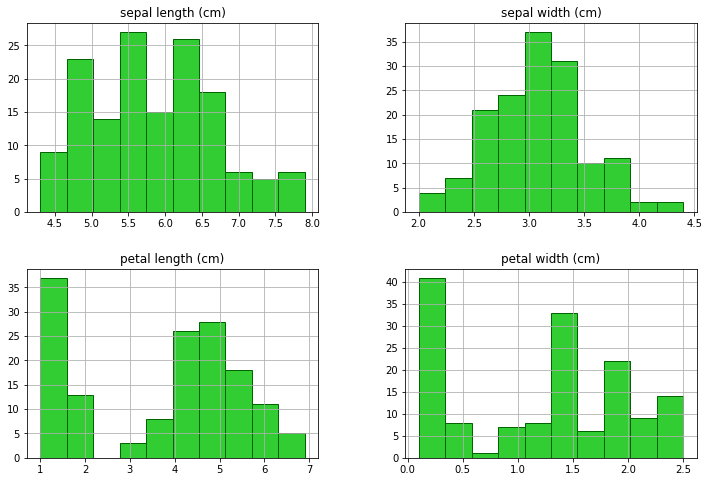

In [8]:
iris_df.hist(figsize =(12,8), color='limegreen', edgecolor='darkgreen')
plt.show()

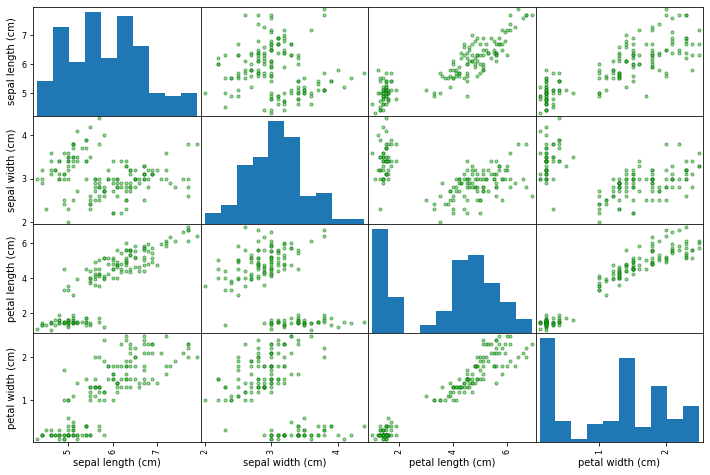

In [9]:
scatter_matrix(iris_df,figsize = (12,8), color='limegreen', edgecolor='darkgreen')
plt.show()

**To find the optimum number of clusters for K-Means we will use 'The Elbow Method' to determine the value of 'k' in K-Means.**

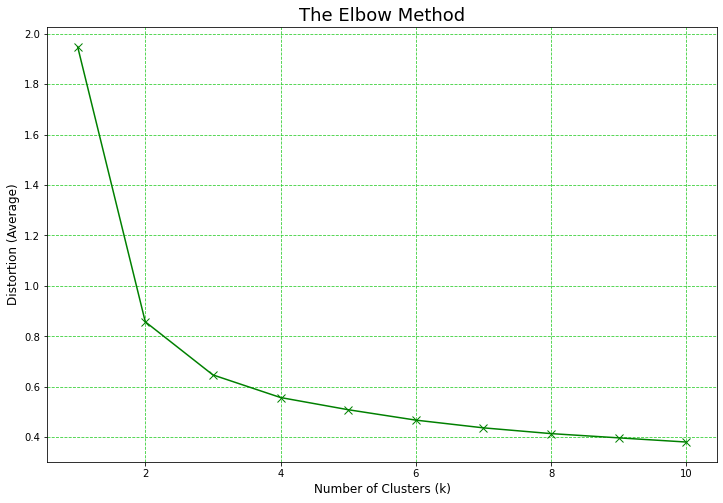

In [10]:
from scipy.spatial.distance import cdist
clusters= range(1,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_df)
    prediction=model.predict(iris_df)
    meanDistortions.append(sum(np.min(cdist(iris_df,model.cluster_centers_,'euclidean'),axis=1))/iris_df.shape[0]) 
    
plt.figure(figsize = (12,8))
plt.plot(clusters,meanDistortions,'bx-', c = 'green', markersize = 8 ) 
plt.title('The Elbow Method',fontsize=18)
plt.xlabel('Number of Clusters (k)',fontsize=12)
plt.ylabel('Distortion (Average)',fontsize=12)
plt.grid(True, color = 'limegreen', linestyle = '--')
plt.show()

- **"The Elbow Method" got its name from the elbow pattern forming above. The optimal clusters are formed where the elbow occurs. This is when the WCSS (Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.**

In [11]:
x = iris_df.iloc[:, :4].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
pd.DataFrame({"Number of Clusters (k)":range(1,11),"Distortion":wcss})

,Number of Clusters (k),Distortion
0,1,678.932886
1,2,151.996867
2,3,78.110474
3,4,56.832954
4,5,46.007005
5,6,38.600810
6,7,34.226281
7,8,29.929135
8,9,28.199940
9,10,25.953925


- **From this we choose the number of clusters as '3'**

***Creating K-Mean Classifier.***

In [12]:
kmeans = KMeans(n_clusters= 3, n_init=10, max_iter=300, random_state=123) 
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=123)

**Centroid Values.**

In [13]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951]])

**Plotting the centroids of the clusters.**

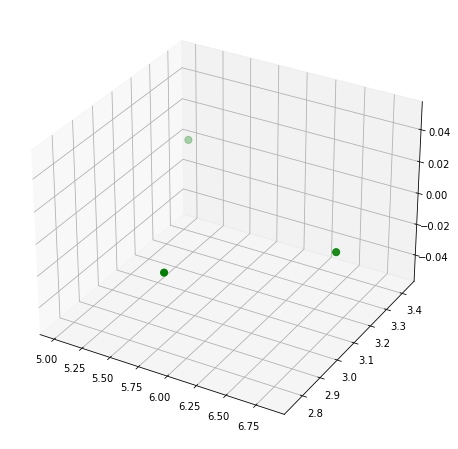

In [14]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'green', label = 'Centroids')
plt.show()

In [15]:
labels = kmeans.labels_
label_clust = iris_df.assign(cluster=labels)
label_clust.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,2


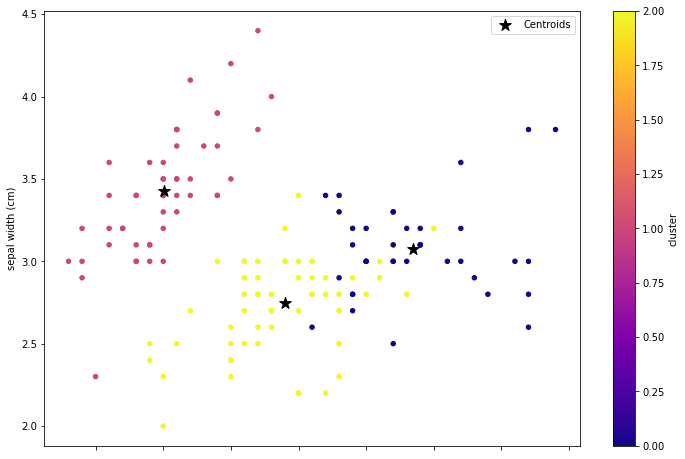

In [16]:
label_clust.plot.scatter(x='sepal length (cm)',y='sepal width (cm)', c='cluster', cmap='plasma', figsize=(12,8))
x = kmeans.cluster_centers_[:, 0]
y = kmeans.cluster_centers_[:,1]
plt.scatter(x,y, marker = '*', s=150, c='Black', label='Centroids')
plt.legend()